# Network Analysis - Random Barabasi Model

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dzcnapy_plotlib as dzcnapy
import csv
import math
import collections as coll
from networkx.algorithms import community as com
import community as lou

# Importazione dataset per calcolo di N, M
with open("dataset.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
    
N = G.number_of_nodes()
E = G.number_of_edges()
M = int(E / N)

G = nx.barabasi_albert_graph(N, M) 

nx.write_graphml(G, "graphs/Barabasi.graphml");


## Nodes, Edges, Density

In [8]:
# Nodi, Archi, Densità
numNodes = G.number_of_nodes()
numEdges = G.number_of_edges()
allEdges = int(numNodes * (numNodes-1) / 2)
density = nx.density(G) * 100
    
# constants
N = numNodes
M = int(numEdges / numNodes)

print("#Nodes:", numNodes)
print("#Edges:", numEdges)
print("#Edges if graph was a full mesh:", allEdges)
print("Density: %.2f%%" % density)

#Nodes: 37702
#Edges: 289004
#Edges if graph was a full mesh: 710701551
Density: 0.04%


## Degree

### Average, variance and standard deviation

In [5]:
avgDeg = (2*G.number_of_edges())/(G.number_of_nodes())
print("Average degree: %.2f" % avgDeg)

deg = [G.degree(n) for n in G.nodes]
var = np.var(deg)
devstd = math.sqrt(var)

print("Variance {:.2f}".format(var))
print("Standard deviation {:.2f}".format(devstd))

Average degree: 15.33
Variance 6526.21
Standard deviation 80.78


### Linear scale distribution

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


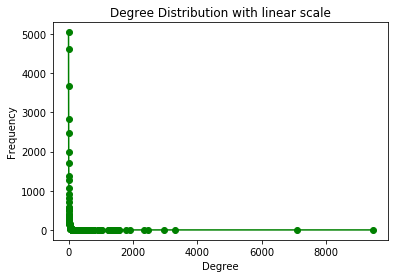

In [6]:
# Degree distribution
degrees = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = coll.Counter(degrees)
x, y = zip(*degreeCount.items())

plt.figure()  
plt.plot(x, y, 'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution') 
plt.title('Degree Distribution with linear scale')
plt.savefig('plots/LinScaleDegreeDistr.png')
plt.show()

### Logarithmic scale distribution

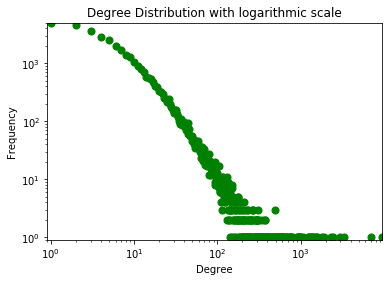

In [7]:
plt.scatter(x, y, s=50, c="green")
plt.xlim(0.9, max(x))
plt.ylim(0.9, max(y))
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title('Degree Distribution with logarithmic scale') 
plt.savefig('plots/LogScaleDegreeDistr.png')

## Clustering coefficient

In [8]:
# TODO eseguire

if False:
    trans= nx.transitivity(G)*100
    # fraction of triadic closures (closed triangles) found in the network
    print("Transitivity coefficient of the network: %.2f%%" %trans)

    # Clustering coefficient
    acc = nx.average_clustering(G)
    print ("Average clustering coefficient {:.2f}".format(acc))

Transitivity coefficient of the network: 1.24%
Average clustering coefficient 0.17


## Greatest Connected Component 

In [11]:

numCC = nx.number_connected_components(G)
gcc = max(nx.connected_component_subgraphs(G), key=len)

# TODO eseguire

if False:
    nodesGcc = Gcc.nodes()
    edgesGcc = Gcc.edges()
    nx.write_graphml(Gcc, "graphs/GCC.graphml");

    print("Numero di componenti connesse:", numCC)
    print("Numero nodi GCC:", len(nodesGcc))
    print("Numero archi GCC:", len(edgesGcc))
    print("Percentuale di nodi sul totale %.2f%%:" %(len(nodesGcc)/len(G.nodes())*100))
    print("Percentuale di archi sul totale %.2f%%:" %(len(edgesGcc)/len(G.edges())*100))
    print("Densità: {:.2f}".format(nx.density(Gcc) * 100))
    print("Distanza media: {:.2f}".format(nx.average_shortest_path_length(Gcc)))


### Distanze GCC

In [13]:
# TODO eseguire

distDict = {}
#i=1
row = []
for n in gcc.nodes():
    nodeDists = nx.single_source_shortest_path_length(gcc,n)
    #if i%1000 == 0:
    #    print(i)
        
    for d in nodeDists:
        #if (int(d) in marked):
        #    continue
        if nodeDists[d] in distDict:
            distDict[nodeDists[d]] = distDict[nodeDists[d]] + 1
        else:
            distDict[nodeDists[d]] = 1
        row.append(nodeDists[d])
    #i += 1

distDict.pop(0)

avgDist, cnt = zip(*distDict.items()) 

plt.bar(avgDist, cnt, width=0.3, color='b')
plt.title("Distance Distribution for G")
plt.ylabel("Frequency")
plt.xlabel("Shortest Path Distance")
#plt.savefig('plots/DistDistributionGlobal.png')
plt.show()

KeyboardInterrupt: 

### GCC Eccentricity - Diameter - Radius - Center - Periphery 

In [15]:
#Eccentricity
ecc = nx.eccentricity(gcc)

# Adding eccentricity data to gcc
for k in ecc.keys():
    Gcc.node[k]['eccentricity'] = ecc.get(k)

KeyboardInterrupt: 

In [ ]:
diameterGcc = nx.diameter(gcc, ecc)
radiusGcc = nx.radius(gcc, ecc)
centerGcc = nx.center(gcc, e=ecc)
peripheryGcc = nx.periphery(gcc, e=ecc)

print ("Diameter GCC:", diameterGcc)
print ("Radius GCC", radiusGcc)

In [ ]:
#Adding data to gcc
nx.set_node_attributes(gcc, 0, 'center')
nx.set_node_attributes(gcc, 0, 'periphery')

for v in range(len(centerGcc)):
    gcc.node[centerGcc[v]]["center"] = 1

for v in range(len(peripheryGcc)):
    gcc.node[peripheryGcc[v]]["periphery"] = 1
    
nx.write_graphml(gcc, "graphs/GccEcc.graphml");

## Distanze

In [ ]:
# Distanza media su tutta la rete
distDict = {}
#i=1
#marked = set()
row = []
for n in G.nodes():
    nodeDists = nx.single_source_shortest_path_length(G,n)
    #if i%1000 == 0:
    #    print(i)
        
    for d in nodeDists:
        #if (int(d) in marked):
        #    continue
        if nodeDists[d] in distDict:
            distDict[nodeDists[d]] = distDict[nodeDists[d]] + 1
        else:
            distDict[nodeDists[d]] = 1
        row.append(nodeDists[d])
    #i += 1
    #marked.add(int(n))

avgShortPathG = np.average(row)
distDict.pop(0)

avgDist, cnt = zip(*distDict.items()) 

print("Average Distance {:.2f}".format(avgShortPathG))

plt.bar(avgDist, cnt, width=0.3, color='b')
plt.title("Distance Distribution for G")
plt.ylabel("Frequency")
plt.xlabel("Shortest Path Distance")
plt.savefig('plots/DistDistributionGlobal.png')
plt.show()


#print("Numero componenti connesse:", nx.number_connected_components(G))
#print("Distanza media:", nx.average_shortest_path_length(G))

## Degree correlation

In [ ]:
# The following code fragment calculates the dictionary and separates the keys and values into 
# two lists my_degree and their_degree:

my_degree, their_degree = zip(*nx.average_degree_connectivity(G).items())

plt.scatter(my_degree, their_degree, s=50, c="b",)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("k")
plt.ylabel("$k_{nn}(k)$")
plt.savefig('plots/Assortativity.png')

## Communities

### 4-Clique Communities

In [5]:
commK  = com.k_clique_communities(G, 4)

print("Clique computed")
lClique = 0
for i,cl in enumerate(commK):
    lClique += 1
    for n in cl:
        G.node[n]["kClique"] = i+1
        
print("Numero 4-Clique communities: ", lClique)

Clique computed


KeyboardInterrupt: 

### Modularity based communities (Louvain)

In [ ]:
part = lou.best_partition(G)
mod = lou.modularity(part,G)

part_as_seriesG = pd.Series(part)
part_as_seriesG.sort_values()
part_as_seriesG.value_counts() 

print("Numero Louvain communities: ", part_as_seriesG.value_counts().size)

In [ ]:
#Saving Communities Attribute
nx.set_node_attributes(G, 0, 'LvnG')
for k in part.keys():
    part[k]+= 1

for i in part.keys():
    G.node[i]["LvnG"] = part.get(i)

nx.write_graphml(G, "graphs/GComm.graphml");

## Centralities

In [ ]:
dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)

centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

# Calculate the correlations for each pair of centralities
c_df = centralities.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_series = c_df.stack().sort_values()
c_series.tail()